<a href="https://colab.research.google.com/github/Tanishasingh22/AD_lab/blob/lab11/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results Before PCA:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.894444   0.775182  0.742786  0.758638
1        Random Forest  0.930000   0.900697  0.771642  0.831190
Results After PCA:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.856444   0.739653  0.551244  0.631699
1        Random Forest  0.863000   0.759866  0.565174  0.648217


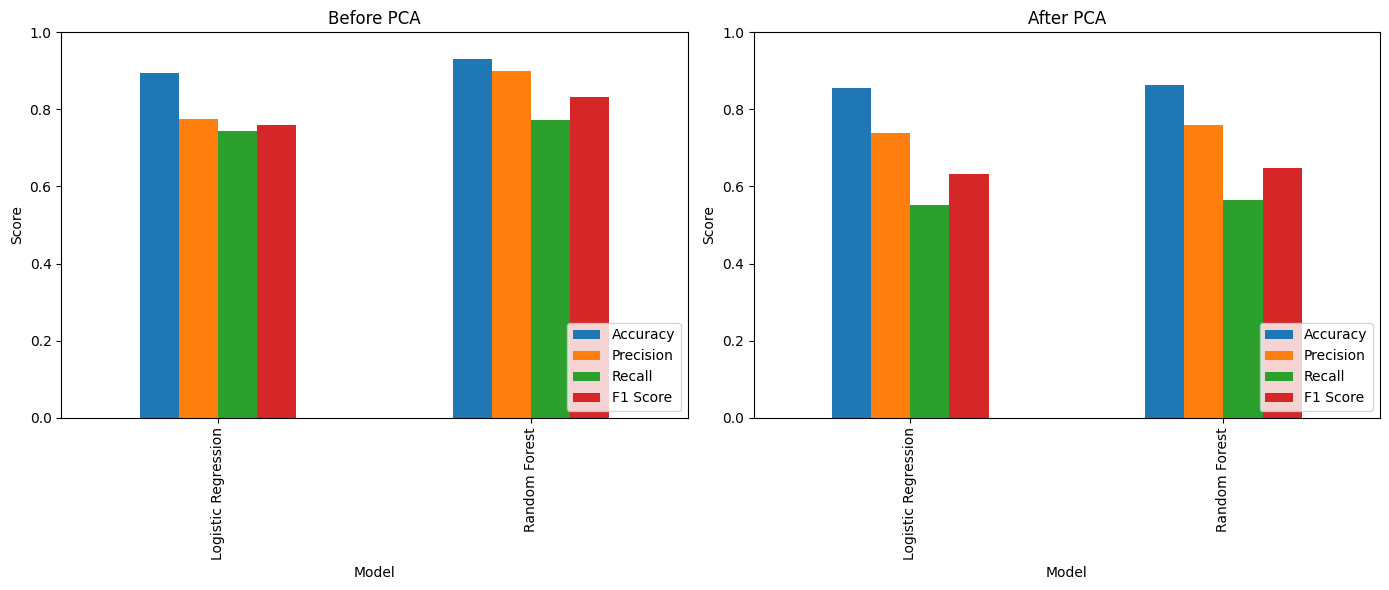

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("loan_data.csv")  # Replace with actual dataset

# Preprocessing
df.dropna(inplace=True)  # Handle missing values
label_enc = LabelEncoder()
df['loan_status'] = label_enc.fit_transform(df['loan_status'])

# Separate features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Convert categorical features
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluate before PCA
results_before_pca = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)
print("Results Before PCA:")
print(results_before_pca)

# Apply PCA
pca = PCA(n_components=5)  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Evaluate after PCA
results_after_pca = evaluate_models(models, X_train_pca, X_test_pca, y_train, y_test)
print("Results After PCA:")
print(results_after_pca)

# Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for i, (df, title) in enumerate(zip([results_before_pca, results_after_pca], ["Before PCA", "After PCA"])):
    df.set_index("Model").plot(kind='bar', ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Score")
    ax[i].legend(loc='lower right')
plt.tight_layout()
plt.show()
